Name: Kunal Kiran Kamat

Class: BE Computer Div: 'A'

Roll No.: 21CO056

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('emails.csv')

In [ ]:
df


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [ ]:
Z=df.drop('Prediction',axis=1)
X=Z.drop('Email No.',axis=1)
y=df['Prediction']

In [ ]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**KNN :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("KNN Performance")
print(classification_report(y_test, knn_predictions))
print("\n-------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("\n-------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

KNN Performance
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1111
           1       0.72      0.82      0.77       441

    accuracy                           0.86      1552
   macro avg       0.82      0.85      0.83      1552
weighted avg       0.87      0.86      0.86      1552


-------------------------------------------------
Accuracy: 0.8576030927835051

-------------------------------------------------
Confusion Matrix:
 [[969 142]
 [ 79 362]]


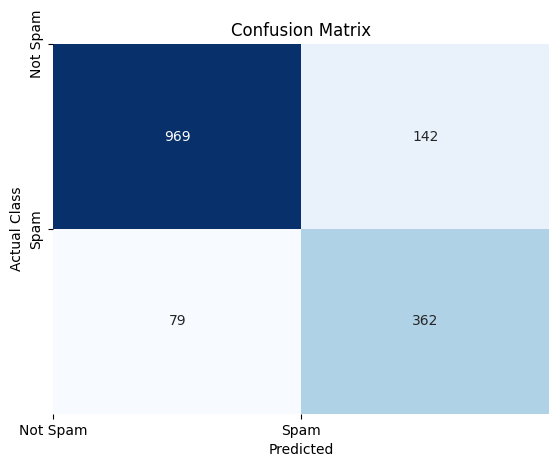

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,knn_predictions)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Class')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

**SVM :**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)


In [ ]:
print("\nSVM Performance")
print(classification_report(y_test, svm_predictions))
print("\n-------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("\n-------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


SVM Performance
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1111
           1       0.91      0.93      0.92       441

    accuracy                           0.95      1552
   macro avg       0.94      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552


-------------------------------------------------
Accuracy: 0.9542525773195877

-------------------------------------------------
Confusion Matrix:
 [[1072   39]
 [  32  409]]


In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1,C=0.8)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [ ]:
print("\nSVM Performance")
print(classification_report(y_test, svm_predictions))
print("\n-------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("\n-------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


SVM Performance
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1111
           1       1.00      0.03      0.07       441

    accuracy                           0.73      1552
   macro avg       0.86      0.52      0.45      1552
weighted avg       0.80      0.73      0.62      1552


-------------------------------------------------
Accuracy: 0.7255154639175257

-------------------------------------------------
Confusion Matrix:
 [[1111    0]
 [ 426   15]]
